## Tensorflow-Regression 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
x_data
noise

array([ 0.21441829, -0.44274351, -0.75704428, ..., -0.06920565,
        0.40407854, -0.64758559])

In [7]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])


In [9]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])


In [10]:
x_df.head()
y_df.head()

,Y
0,5.214418
1,4.557261
2,4.242966
3,3.698117
4,4.744554


In [11]:
my_data = pd.concat([x_df,y_df],axis=1)

In [12]:
my_data.head()

,X_Data,Y
0,0.00000,5.214418
1,0.00001,4.557261
2,0.00002,4.242966
3,0.00003,3.698117
4,0.00004,4.744554


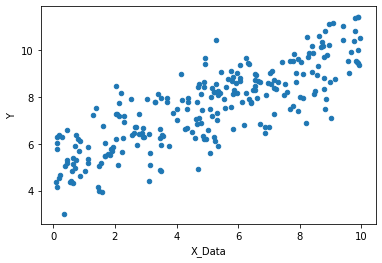

In [13]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [17]:
batch_size = 10

In [18]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [19]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [20]:
#model
y_model = m*xph + b

In [21]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [23]:
init = tf.global_variables_initializer()


In [24]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [25]:
model_m

0.50178164

In [26]:
model_b

5.0204854

In [27]:
y_hat = x_data * model_m + model_b

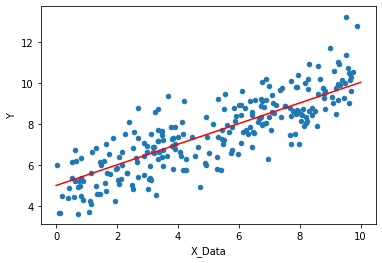

In [28]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

In [30]:
#Estimator API
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [31]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\JANEAL~1\\AppData\\Local\\Temp\\tmp5croh0mb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000007B7BCF1948>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
